In [2]:
import pandas as a
sensus = {
    'tinggi' : [158, 170, 183, 191, 155, 163, 180, 158, 178],
    'berat'  : [64, 86, 84, 80, 49, 59, 67, 54, 67],
    'jk'     : ['pria', 'pria', 'pria', 'pria', 'wanita', 'wanita', 'wanita', 'wanita', 'wanita',]
}
sensus_df = a.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


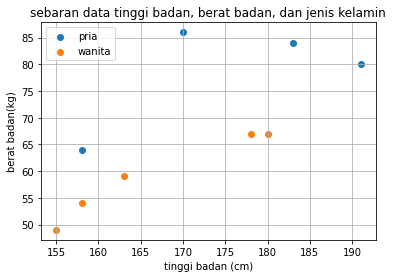

In [3]:
import matplotlib.pyplot as b
fig, ax = b.subplots()
for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label = jk)
b.legend(loc = 'upper left')
b.title('sebaran data tinggi badan, berat badan, dan jenis kelamin')
b.xlabel('tinggi badan (cm)')
b.ylabel('berat badan(kg)')
b.grid(True)
b.show()

In [4]:
import numpy as c
x_train = c.array(sensus_df[['tinggi', 'berat']])
y_train = c.array(sensus_df['jk'])
print(f'x_train : \n{x_train}\n')
print(f'y_train : {y_train}')

x_train : 
[[158  64]
 [170  86]
 [183  84]
 [191  80]
 [155  49]
 [163  59]
 [180  67]
 [158  54]
 [178  67]]

y_train : ['pria' 'pria' 'pria' 'pria' 'wanita' 'wanita' 'wanita' 'wanita' 'wanita']


In [5]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
print(f'y_train : {y_train}')

y_train : [[0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [6]:
y_train = y_train.flatten()
print(f'y_train : {y_train}')

y_train : [0 0 0 0 1 1 1 1 1]


In [8]:
from sklearn.neighbors import KNeighborsClassifier
K = 3
model = KNeighborsClassifier (n_neighbors = K)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [9]:
tinggi_badan = 155
berat_badan = 70
x_new = c.array([tinggi_badan, berat_badan]).reshape(1, -1)
x_new

array([[155,  70]])

In [10]:
y_new = model.predict(x_new)
y_new

array([1])

In [11]:
lb.inverse_transform(y_new)

array(['wanita'], dtype='<U6')

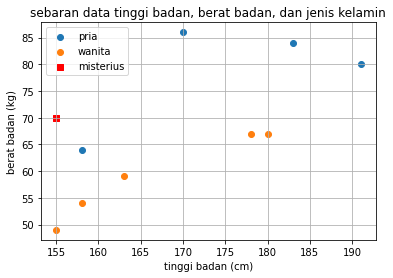

In [17]:
import matplotlib.pyplot as b
fig, ax = b.subplots()

for jk, d in sensus_df.groupby('jk'):
    ax.scatter(d['tinggi'], d['berat'], label = jk)
    
b.scatter(tinggi_badan,
          berat_badan, 
          marker = 's',
          color = 'red',
          label = 'misterius')

b.legend(loc = 'upper left')
b.title('sebaran data tinggi badan, berat badan, dan jenis kelamin')
b.xlabel('tinggi badan (cm)')
b.ylabel('berat badan (kg)')
b.grid(True)
b.show()

In [18]:
misterius = c.array([tinggi_badan, berat_badan])
misterius

array([155,  70])

In [19]:
x_train

array([[158,  64],
       [170,  86],
       [183,  84],
       [191,  80],
       [155,  49],
       [163,  59],
       [180,  67],
       [158,  54],
       [178,  67]], dtype=int64)

In [20]:
from scipy.spatial.distance import euclidean
data_jarak = [euclidean(misterius, d) for d in x_train]
data_jarak

[6.708203932499369,
 21.93171219946131,
 31.304951684997057,
 37.36308338453881,
 21.0,
 13.601470508735444,
 25.179356624028344,
 16.278820596099706,
 23.194827009486403]

In [21]:
sensus_df['jarak'] = data_jarak
sensus_df.sort_values(['jarak'])

,tinggi,berat,jk,jarak
0,158,64,pria,6.708204
5,163,59,wanita,13.601471
7,158,54,wanita,16.278821
4,155,49,wanita,21.000000
1,170,86,pria,21.931712
8,178,67,wanita,23.194827
6,180,67,wanita,25.179357
2,183,84,pria,31.304952
3,191,80,pria,37.363083


In [22]:
x_test = c.array([[168, 85], [180, 96], [160, 52], [169, 67]])
y_test = lb.transform(c.array(['pria', 'pria', 'wanita', 'wanita'])).flatten()
print(f'x_test : \n{x_test}\n')
print(f'y_test : \n{y_test}')

x_test : 
[[168  85]
 [180  96]
 [160  52]
 [169  67]]

y_test : 
[0 0 1 1]


In [24]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 1])

In [25]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print(f'accuracy : {acc}')

accuracy : 1.0


In [26]:
from sklearn.metrics import precision_score
prec = precision_score(y_test, y_pred)
print(f'precision : {prec}')

precision : 1.0


In [27]:
from sklearn.metrics import recall_score
rec = recall_score(y_test, y_pred)
print(f'recall : {rec}')

recall : 1.0


In [28]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f'f1-score : {f1}')

f1-score : 1.0


In [29]:
from sklearn.metrics import classification_report
cls_report= classification_report(y_test, y_pred)
print(f'classification_report : \n{cls_report}')

classification_report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



In [30]:
from sklearn.metrics import matthews_corrcoef
mcc = matthews_corrcoef(y_test, y_pred)
print(f'mcc : {mcc}')

mcc : 1.0
